In [2]:
%pip install ucimlrepo pyAgrum 

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 2.1 MB/s  0:00:03m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pyAgrum]m2/3 [pyAgrum]
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import pyagrum as gum
import pyagrum.lib.notebook as gnb
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


In [4]:
# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [5]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
X.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
dtype: int64

In [8]:
y.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [9]:
# В нашей байесовской сети будем оценивать G3 - финальную оценку ученика, предварительно переведем в категории
y = y['G3'].apply(lambda x: str(x // 5))

In [10]:
y.sample(10)

451    2
557    2
293    2
438    2
350    2
432    1
116    3
634    3
8      3
440    0
Name: G3, dtype: object

In [11]:
X = X[['famsup', 'studytime', 'romantic', 'goout', 'internet', 'famrel', 'address']]

X.head()

,famsup,studytime,romantic,goout,internet,famrel,address
0,no,2,no,4,no,4,U
1,yes,2,no,3,yes,5,U
2,no,2,no,2,yes,4,U
3,yes,3,yes,2,yes,3,U
4,yes,2,no,2,no,4,U


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   famsup     649 non-null    object
 1   studytime  649 non-null    int64 
 2   romantic   649 non-null    object
 3   goout      649 non-null    int64 
 4   internet   649 non-null    object
 5   famrel     649 non-null    int64 
 6   address    649 non-null    object
dtypes: int64(3), object(4)
memory usage: 35.6+ KB


In [14]:
X['famsup'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'int64':
        X.loc[:, col] = le.fit_transform(X[col])
    else:
        if set(X[col].unique()) == {'no', 'yes'            }:
            X.loc[:, col] = X[col].map({'no': 0, 'yes': 1}).astype('str')
        else: # U или R для адреса
            X.loc[:, col] = X[col].map({'R': 0, 'U': 1}).astype('str')

In [16]:
le = LabelEncoder()

y.data = le.fit_transform(y)

In [17]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: G3, dtype: object

In [18]:
df = pd.concat([X, y], axis=1)

In [19]:
df

,famsup,studytime,romantic,goout,internet,famrel,address,G3
0,0,1,0,3,0,3,1,2
1,1,1,0,2,1,4,1,2
2,0,1,0,1,1,3,1,2
3,1,2,1,1,1,2,1,2
4,1,1,0,1,0,3,1,2
...,...,...,...,...,...,...,...,...
644,0,2,0,1,1,4,0,2
645,1,1,0,3,1,3,1,3
646,0,1,0,0,0,0,1,1
647,0,0,0,4,1,1,1,2


Nodes in DAG: {'internet', 'romantic', 'studytime', 'goout', 'famsup', 'famrel', 'address', 'G3'}
Arcs in DAG: {(0, 1), (0, 7), (2, 1), (6, 5), (3, 7), (6, 4), (2, 3), (1, 7), (0, 5), (5, 3), (6, 3), (4, 1)}


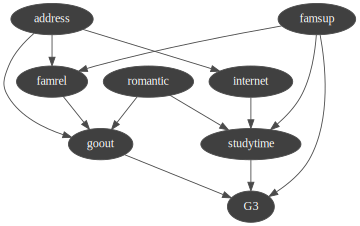

In [20]:
bn = gum.BayesNet('Student Performance')

card = {c: int(df[c].nunique()) for c in df.columns}

for varname in df.columns:
    K = card[varname]
    lv = gum.LabelizedVariable(varname, varname, K)
    # (ярлыки не обязательны; setLabels(...) можно добавить при желании)
    bn.add(lv)

# Логические дуги (см. объяснение выше)
arcs = [
    ("address", "internet"),
    ("address", "goout"),
    ("address", "famrel"),
    ("famsup",  "studytime"),
    ("famsup",  "famrel"),
    ("romantic","goout"),
    ("romantic","studytime"),
    ("famrel",  "goout"),
    ("internet","studytime"),
    # Родители целевой:
    ("studytime","G3"),
    ("goout",   "G3"),
    ("famsup",  "G3"),
]
for u,v in arcs:
    bn.addArc(u, v)

print("Nodes in DAG:", bn.names())
print("Arcs in DAG:", bn.arcs())


# 5) Визуализация структуры
gnb.showBN(bn)

In [21]:
learner = gum.BNLearner(df, bn)
learner.useSmoothingPrior()
print(learner)
params=learner.learnParameters(bn.dag())

Filename       : /tmp/tmpsdjdbz3u.csv
Size           : (649,8)
Variables      : famsup[2], studytime[4], romantic[2], goout[5], internet[2], famrel[5], address[2], G3[4]
Induced types  : False
Missing values : False
Algorithm      : MIIC
Correction     : MDL
Prior          : Smoothing
Prior weight   : 1.000000



In [22]:
for node in params.names():
    print(f"CPT of {node}:\n{params.cpt(node)}\n")

CPT of internet:

      ||  internet         |
addres||0        |1        |
------||---------|---------|
0     || 0.3467  | 0.6533  |
1     || 0.1850  | 0.8150  |


CPT of romantic:

  romantic         |
0        |1        |
---------|---------|
 0.6313  | 0.3687  |


CPT of studytime:

                    ||  studytime                            |
famsup|romant|intern||0        |1        |2        |3        |
------|------|------||---------|---------|---------|---------|
0     |0     |0     || 0.4783  | 0.3478  | 0.1087  | 0.0652  |
1     |0     |0     || 0.2742  | 0.5000  | 0.1290  | 0.0968  |
0     |1     |0     || 0.2667  | 0.5333  | 0.1333  | 0.0667  |
1     |1     |0     || 0.3448  | 0.4483  | 0.1724  | 0.0345  |
0     |0     |1     || 0.4957  | 0.3504  | 0.1197  | 0.0342  |
1     |0     |1     || 0.2488  | 0.5174  | 0.1443  | 0.0896  |
0     |1     |1     || 0.2838  | 0.4865  | 0.1757  | 0.0541  |
1     |1     |1     || 0.2787  | 0.4590  | 0.2213  | 0.0410  |


CPT of goout:

  

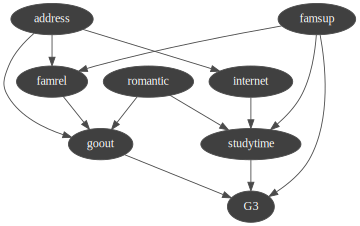

In [24]:
gnb.showBN(bn)

In [25]:
ie = gum.LazyPropagation(params)

evidences = [
    {
        "goout": 1,
        "famsup": 1,
        "internet": 0
    },

    {
        "studytime": 3,   # >10 часов в неделю
        "goout": 0,       # редко гуляет
        "famsup": 1,      # есть поддержка семьи
        "internet": 1,    # есть интернет
        "romantic": 0,    # не в отношениях
        "famrel": 4,      # отличные отношения в семье
        "address": 1      # город
    },
    {
        "studytime": 0,   # <2h
        "goout": 2,       # часто гуляет
        "famsup": 0,      # поддержки нет
        "internet": 1,    # есть интернет
        "romantic": 1,    # есть отношения
        "famrel": 2,      # средние отношения
        "address": 1      # город
    }

]

for evidence in evidences:
    ie.setEvidence(evidence)
    ie.makeInference()

    print(f"Posterior distribution for G3 with parameters: {evidence}")
    print(ie.posterior("G3"))

Posterior distribution for G3 with parameters: {'goout': 1, 'famsup': 1, 'internet': 0}

  G3                                   |
0        |1        |2        |3        |
---------|---------|---------|---------|
 0.0439  | 0.1326  | 0.5541  | 0.2694  |

Posterior distribution for G3 with parameters: {'studytime': 3, 'goout': 0, 'famsup': 1, 'internet': 1, 'romantic': 0, 'famrel': 4, 'address': 1}

  G3                                   |
0        |1        |2        |3        |
---------|---------|---------|---------|
 0.2000  | 0.2000  | 0.4000  | 0.2000  |

Posterior distribution for G3 with parameters: {'studytime': 0, 'goout': 2, 'famsup': 0, 'internet': 1, 'romantic': 1, 'famrel': 2, 'address': 1}

  G3                                   |
0        |1        |2        |3        |
---------|---------|---------|---------|
 0.1000  | 0.2333  | 0.5333  | 0.1333  |

